2. You will be using the Carseats dataset (Carseats_train.csv and Carseats_test.csv). This
dataset contains 10 covariates (CompPrice, Income, Advertising, Population, Price,
ShelveLoc, Age, Education, Urban, US) and the response variable that is to be predicted
is Sales. You will now use your trained linear regression models to make predictions for data
points not seen during training and evaluate the performance of your model. In the following
questions, you have to compute the test loss which can be written as:
Note that you are not supposed to add the L1 or L2 penalties when you are evaluating
your model. For each of the following training configurations, report the test loss after
training.

a. 5 epochs, no regularization, η = 0.01

b. 5 epochs, no regularization, η = 0.001

c. 5 epochs, L2 regularization, η = 0.001, λ = 0.1

d. 5 epochs, L1 regularization, η = 0.001, λ = 0.1

Please report the loss values to at least five decimal places

In [ ]:
import pandas as pd
train_data = pd.read_csv('Carseats_training.csv')
test_data = pd.read_csv('Carseats_testing.csv')

In [ ]:
train_data.head()

,ID,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,10.48,138,72,0,148,94,Medium,27,17,Yes,Yes
1,2,10.43,77,69,0,25,24,Medium,50,18,Yes,No
2,3,5.32,118,74,6,426,102,Medium,80,18,Yes,Yes
3,4,7.67,129,117,8,400,101,Bad,36,10,Yes,Yes
4,5,5.32,152,116,0,170,160,Medium,39,16,Yes,No


In [ ]:
test_data.head()

,ID,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,107,111,14,400,103,Medium,41,11,No,Yes
1,2,147,58,7,100,191,Bad,27,15,Yes,Yes
2,3,115,89,0,38,122,Medium,25,12,Yes,No
3,4,122,76,0,270,100,Good,60,18,No,No
4,5,123,84,0,74,89,Good,59,10,Yes,No


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract features and target variable
X_train = train_data.drop(columns=["Sales", "ID"]).values
y_train = train_data["Sales"].values
X_test = test_data.drop(columns=["ID"]).values

In [ ]:
# List of continuous covariates
continuous_covariates = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

# Calculate mean and variance for each continuous covariate in the training dataset
mean_values = train_data[continuous_covariates].mean()
variance_values = train_data[continuous_covariates].var()

# Standardize the training dataset
train_data[continuous_covariates] = (train_data[continuous_covariates] - mean_values) / variance_values

# Using same mean and variance values to standardize the test dataset
test_data[continuous_covariates] = (test_data[continuous_covariates] - mean_values) / variance_values


In [ ]:
# Define functions for loss, gradients, and regularization
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)



In [ ]:
# @title Training sequences




1. Question 1: Implement the digit classifier using the low level TensorFlow API without Keras
abstraction.

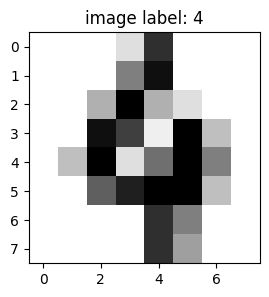

In [ ]:
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

sample_index = 100
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1527, 64), (1527,)), ((270, 64), (270,)))

In [ ]:
def gen_dataset(x, y, batch_size=128):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.shuffle(buffer_size=10000, seed=42)
    dataset = dataset.batch(batch_size=batch_size)
    return dataset

def init_weights(shape):
    return tf.Variable(tf.random.normal(shape, stddev=0.01))


def accuracy(y_pred, y):
    return np.mean(np.argmax(y_pred, axis=1) == y)


def test_model(model, x, y):
    dataset = gen_dataset(x, y)
    preds, targets = [], []

    for batch_x, batch_y in dataset:
        preds.append(model(batch_x).numpy())
        targets.append(batch_y.numpy())

    preds, targets = np.concatenate(preds), np.concatenate(targets)
    return accuracy(preds, targets)

In [ ]:
batch_size = 32
hid_size = 15
learning_rate = 0.5
num_epochs = 30
input_size = X_train.shape[1]
output_size = 10


# build the model and weights
class MyModel:
    def __init__(self, input_size, hid_size, output_size):
        # randomly initialize all the internal variables of the model:
        self.W_h = tf.Variable(tf.random.normal([input_size, hid_size], stddev=0.01))
        self.b_h = tf.Variable(tf.zeros([hid_size]))
        self.W_o = tf.Variable(tf.random.normal([hid_size, output_size], stddev=0.01))
        self.b_o = tf.Variable(tf.zeros([output_size]))


    def __call__(self, inputs):

        h = tf.nn.tanh(tf.matmul(inputs, self.W_h) + self.b_h)
        logits = tf.matmul(h, self.W_o) + self.b_o
        return logits

model = MyModel(input_size, hid_size, output_size)


In [ ]:
test_model(model, X_test, y_test)

0.07407407407407407

Epoch 0, train_acc = 0.9208, test_acc = 0.9259
Epoch 1, train_acc = 0.9745, test_acc = 0.9556
Epoch 2, train_acc = 0.9856, test_acc = 0.963
Epoch 3, train_acc = 0.9876, test_acc = 0.9593
Epoch 4, train_acc = 0.9915, test_acc = 0.963
Epoch 5, train_acc = 0.9948, test_acc = 0.963
Epoch 6, train_acc = 0.9967, test_acc = 0.9667
Epoch 7, train_acc = 0.9993, test_acc = 0.9667
Epoch 8, train_acc = 0.9993, test_acc = 0.963
Epoch 9, train_acc = 0.9993, test_acc = 0.9704
Epoch 10, train_acc = 0.9993, test_acc = 0.9704
Epoch 11, train_acc = 0.9993, test_acc = 0.9704
Epoch 12, train_acc = 0.9993, test_acc = 0.9704
Epoch 13, train_acc = 0.9993, test_acc = 0.9667
Epoch 14, train_acc = 0.9993, test_acc = 0.9667
Epoch 15, train_acc = 1.0, test_acc = 0.9667
Epoch 16, train_acc = 1.0, test_acc = 0.9704
Epoch 17, train_acc = 1.0, test_acc = 0.9704
Epoch 18, train_acc = 1.0, test_acc = 0.9704
Epoch 19, train_acc = 1.0, test_acc = 0.9704
Epoch 20, train_acc = 1.0, test_acc = 0.9667
Epoch 21, train_acc = 1.

0.9666666666666667

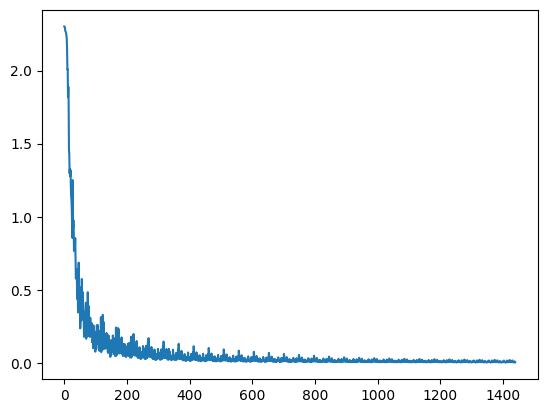

In [ ]:
losses = []
for e in range(num_epochs):
    train_dataset = gen_dataset(X_train, y_train, batch_size=batch_size)

    for batch_x, batch_y in train_dataset:

        with tf.GradientTape() as tape:
            logits = model(batch_x)
            loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(batch_y, logits))
            losses.append(loss.numpy())


        dW_h, db_h, dW_o, db_o = tape.gradient(
            loss, [model.W_h, model.b_h, model.W_o, model.b_o])

        model.W_h.assign_sub(learning_rate * dW_h)
        model.b_h.assign_sub(learning_rate * db_h)
        model.W_o.assign_sub(learning_rate * dW_o)
        model.b_o.assign_sub(learning_rate * db_o)

    train_acc = test_model(model, X_train, y_train)
    test_acc = test_model(model, X_test, y_test)
    print("Epoch {}, train_acc = {}, test_acc = {}".format(e, round(train_acc, 4), round(test_acc, 4)))

plt.plot(losses)

test_model(model, X_test, y_test)